<a href="https://colab.research.google.com/github/SiddharthPh/SVM_health_poisoning/blob/main/Copy_of_SVM_POISONING_Health_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input,Flatten , Dense , Dropout , BatchNormalization , MaxPool2D ,Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model,load_model
from sklearn.metrics import classification_report

In [ ]:
!unzip archive.zip -d archive

train_dir='archive/Training'
train_generator=ImageDataGenerator(
    rescale= 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=30
).flow_from_directory(train_dir,target_size=(224,224),subset="training",shuffle=True)



Streaming output truncated to the last 5000 lines.
  inflating: archive/Training/glioma/Tr-gl_0713.jpg  
  inflating: archive/Training/glioma/Tr-gl_0714.jpg  
  inflating: archive/Training/glioma/Tr-gl_0715.jpg  
  inflating: archive/Training/glioma/Tr-gl_0716.jpg  
  inflating: archive/Training/glioma/Tr-gl_0717.jpg  
  inflating: archive/Training/glioma/Tr-gl_0718.jpg  
  inflating: archive/Training/glioma/Tr-gl_0719.jpg  
  inflating: archive/Training/glioma/Tr-gl_0720.jpg  
  inflating: archive/Training/glioma/Tr-gl_0721.jpg  
  inflating: archive/Training/glioma/Tr-gl_0722.jpg  
  inflating: archive/Training/glioma/Tr-gl_0723.jpg  
  inflating: archive/Training/glioma/Tr-gl_0724.jpg  
  inflating: archive/Training/glioma/Tr-gl_0725.jpg  
  inflating: archive/Training/glioma/Tr-gl_0726.jpg  
  inflating: archive/Training/glioma/Tr-gl_0727.jpg  
  inflating: archive/Training/glioma/Tr-gl_0728.jpg  
  inflating: archive/Training/glioma/Tr-gl_0729.jpg  
  inflating: archive/Training/g

In [ ]:
valid_dir='archive/Testing'
valid_generator=ImageDataGenerator(
    rescale= 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=30
).flow_from_directory(valid_dir,target_size=(224,224),shuffle=False)

Found 1311 images belonging to 4 classes.


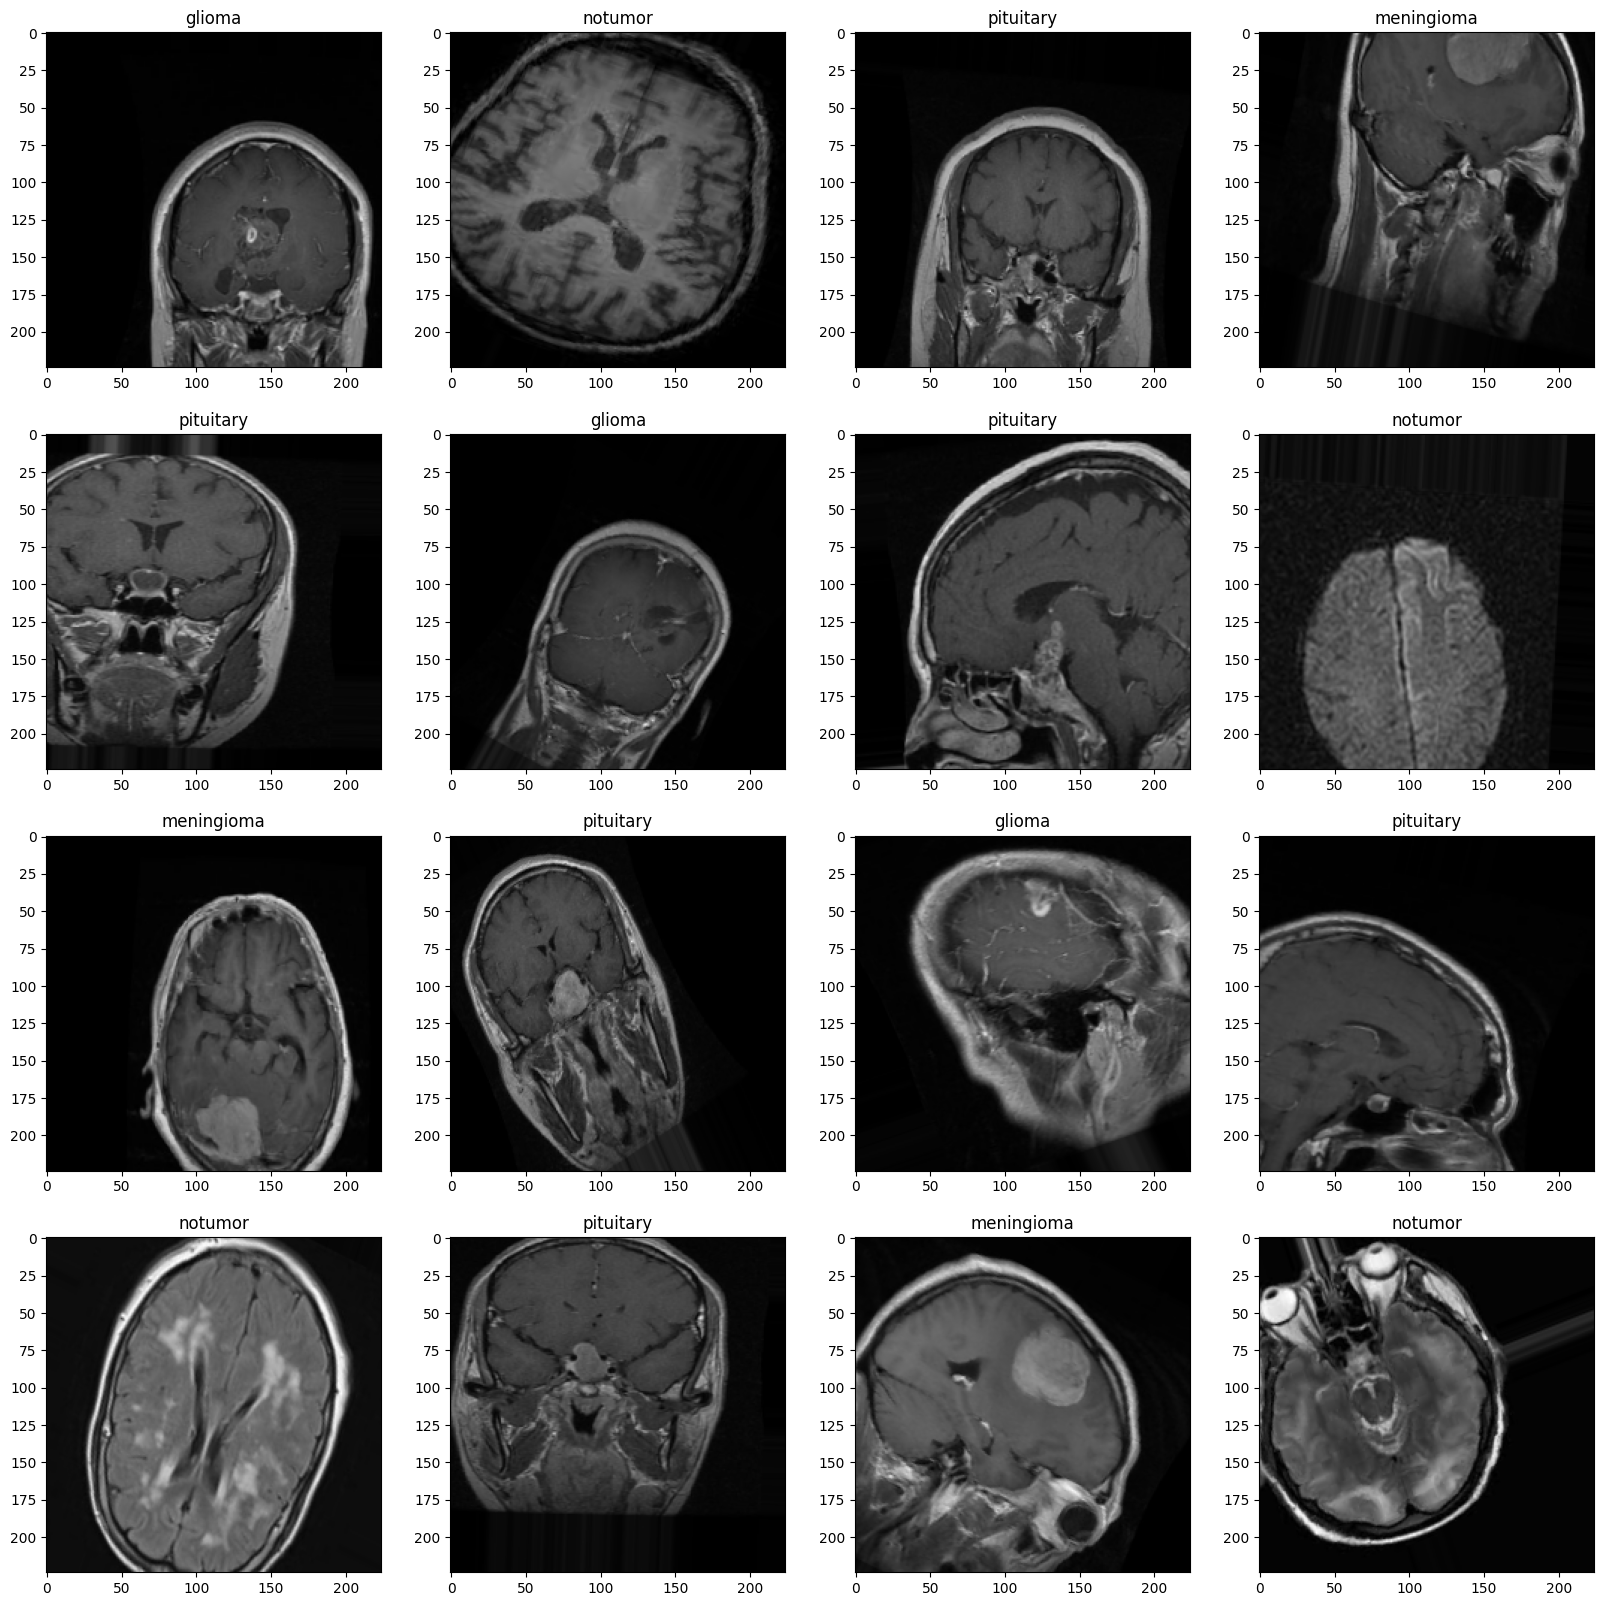

In [ ]:
classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    plt.show()
    break

In [ ]:
img_size = (224,224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
# x = Conv2D(256, (3,3) , padding = 'same' , activation='relu') (input_img)
# x = Conv2D(64, (3,3) , padding = 'same' , activation='relu') (x)
# x = MaxPool2D((2,2), strides=(2,2)) (x)
# x = Dropout(0.25)(x)
# x = Conv2D(128, (3,3) , padding = 'same' , activation='relu') (x)
# x = MaxPool2D((2,2), strides=(2,2)) (x)
# x = Dropout(0.25)(x)
# x = Conv2D(128, (3,3) , padding = 'same' , activation='relu') (x)
# x = MaxPool2D((2,2), strides=(2,2)) (x)
# x = Dropout(0.25)(x)
# x = Conv2D(64, (3,3) , padding = 'same' , activation='relu') (x)
# x = MaxPool2D((2,2), strides=(2,2)) (x)
# x = Dropout(0.25)(x)
# # Connented Layer and Output Layer
# x = Flatten()(x)
# x = Dense(32,)(x)
# x = Dropout(0.5) (x)
# x = Dense(4, activation='sigmoid')(x)
# model = Model(inputs = input_img, outputs =x , name='Brain_Tumer')

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')


model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(4, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

43941136/43941136 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 1536)             10783535  
                                                                 
 batch_normalization (BatchN  (None, 1536)             6144      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 11,184,179
Trainable params: 11,093,804
Non-trainable params: 90,375
_______________________________________

In [ ]:
epochs = 10

model_train = model.fit(x= train_generator, epochs= epochs, verbose= 1, validation_data= valid_generator,
                    validation_steps= None, shuffle= False)

Epoch 1/10
179/179 [==============================] - 227s 808ms/step - loss: 6.5304 - accuracy: 0.8235 - val_loss: 7.6240 - val_accuracy: 0.2296
Epoch 2/10
179/179 [==============================] - 141s 786ms/step - loss: 3.7414 - accuracy: 0.9289 - val_loss: 4.1542 - val_accuracy: 0.3776
Epoch 3/10
179/179 [==============================] - 142s 795ms/step - loss: 2.2934 - accuracy: 0.9533 - val_loss: 3.1312 - val_accuracy: 0.4645
Epoch 4/10
179/179 [==============================] - 141s 786ms/step - loss: 1.4145 - accuracy: 0.9674 - val_loss: 3.4899 - val_accuracy: 0.3410
Epoch 5/10
179/179 [==============================] - 141s 787ms/step - loss: 0.8761 - accuracy: 0.9737 - val_loss: 29.1009 - val_accuracy: 0.3257
Epoch 6/10
179/179 [==============================] - 141s 785ms/step - loss: 0.5791 - accuracy: 0.9730 - val_loss: 20.4776 - val_accuracy: 0.2555
Epoch 7/10
179/179 [==============================] - 140s 782ms/step - loss: 0.4109 - accuracy: 0.9769 - val_loss: 15.801

In [ ]:
featuers_extractor = Model(model.input, model.layers[-4].output)
featuers_extractor.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3_input (Input  [(None, 224, 224, 3)]    0         
 Layer)                                                          
                                                                 
 efficientnetb3 (Functional)  (None, 1536)             10783535  
                                                                 
 batch_normalization (BatchN  (None, 1536)             6144      
 ormalization)                                                   
                                                                 
Total params: 10,789,679
Trainable params: 10,699,304
Non-trainable params: 90,375
_________________________________________________________________


In [ ]:
batch_index=0
X_train_features=[]
y_train_one_hot=[]
while batch_index <= train_generator.batch_index:
    data = train_generator.next()
    for element in data[0]:
       X_train_features.append(featuers_extractor.predict(np.array([element])).reshape(-1))
    for target in data[1]:
       y_train_one_hot.append(target)
    batch_index = batch_index + 1
del train_generator
X_train_features=np.array(X_train_features)
y_train_one_hot=np.array(y_train_one_hot)
y_train=[]
for y in y_train_one_hot:
    y_train.append(np.argmax(y))

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 60ms/step


In [ ]:
X_test_features=[]
y_test_one_hot=[]
batch_index=0
while batch_index <= valid_generator.batch_index:
    data = valid_generator.next()
    for element in data[0]:
       X_test_features.append(featuers_extractor.predict(np.array([element])).reshape(-1))
    for target in data[1]:
       y_test_one_hot.append(target)
    batch_index = batch_index + 1
del valid_generator
X_test_features=np.array(X_test_features)
y_test_one_hot=np.array(y_test_one_hot)
y_test=[]
for y in y_test_one_hot:
    y_test.append(np.argmax(y))

1/1 [==============================] - 0s 56ms/step


In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train_features, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svm.predict(X_test_features)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       300
           1       0.91      0.95      0.93       306
           2       0.98      0.99      0.98       405
           3       0.97      0.96      0.96       300

    accuracy                           0.96      1311
   macro avg       0.96      0.95      0.96      1311
weighted avg       0.96      0.96      0.96      1311

